# Region segmentation

In [4]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from keras.models import load_model
import cv2
ROOT_DIR = os.path.abspath("../../")
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from main.doc import train

%matplotlib inline 
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

## Configurations

In [5]:
config = train.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/doc")

In [6]:
class InferenceConfig(config.__class__):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "square"
    DETECTION_MIN_CONFIDENCE = 0.6
    DETECTION_NMS_THRESHOLD = 0.3
    PRE_NMS_LIMIT = 12000
    RPN_ANCHOR_SCALES = (8,32,64,256,1024)
    RPN_ANCHOR_RATIOS = [1,3,10]

    POST_NMS_ROIS_INFERENCE = 12000
    
    '''
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_RESIZE_MODE = "square"
    DETECTION_MIN_CONFIDENCE = 0.3
    DETECTION_NMS_THRESHOLD = 0.3
    PRE_NMS_LIMIT = 12000
    RPN_ANCHOR_SCALES = (8,32,64,256,1024)
    RPN_ANCHOR_RATIOS = [1,3,10]

    POST_NMS_ROIS_INFERENCE = 12000
    '''
    
    
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        150
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                23
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 2.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 2.0, 'mrcnn_mask_loss': 5.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Notebook Preferences

In [7]:
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0
TEST_MODE = "inference"

In [8]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [9]:
dataset = train.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "val")
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 80
Classes: ['BG', 'H-V', 'H', 'CLS', 'PD', 'PB', 'CC', 'P', 'D', 'LM', 'BL']


## Load Model

In [10]:
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [12]:
# weights_path = model.find_last()
weights_path= "/home/abhishek/prusty/Mask_RCNN/logs/object20190207T2135/mask_rcnn_object_0054.h5"
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)


Loading weights  /home/abhishek/prusty/Mask_RCNN/logs/object20190207T2135/mask_rcnn_object_0054.h5
Re-starting from epoch 54


## Run Detection

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  209.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   91.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -1.58268  max:    2.52012  float32


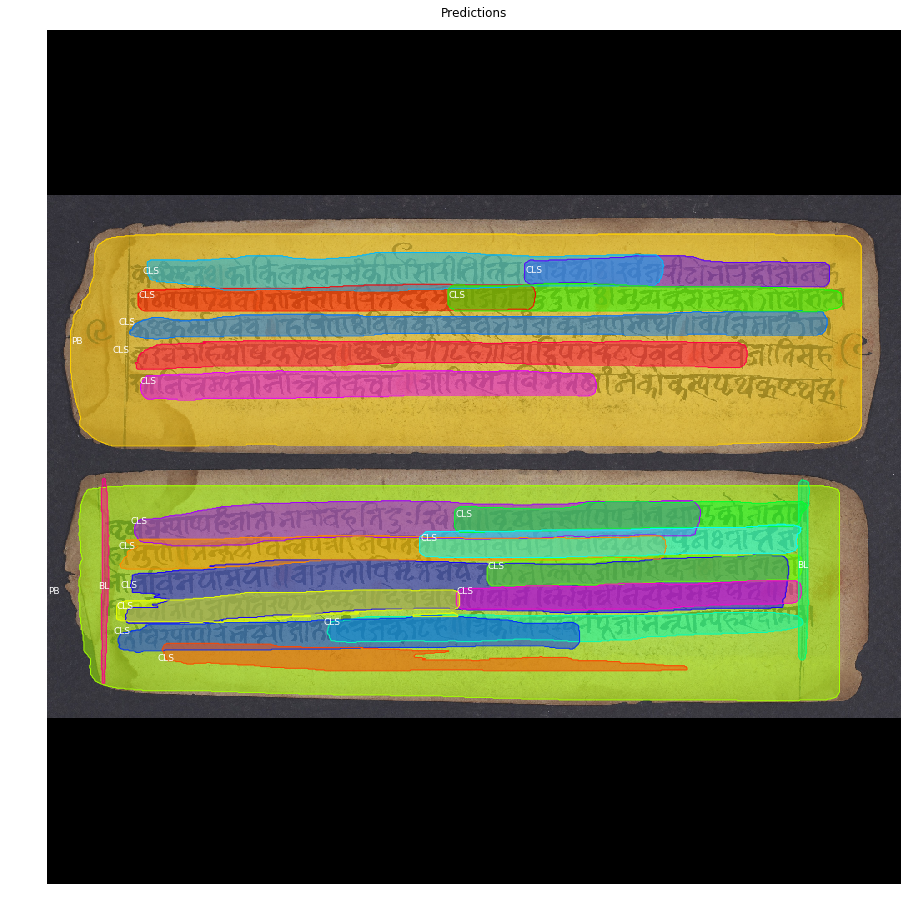

In [13]:
image=cv2.imread('im3.jpg',1)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image,_,scale,padding,_=utils.resize_image(image,min_dim=256, max_dim=1024)
results = model.detect([image], verbose=1)
ax = get_ax(1)
r = results[0]
ccc,contours=visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions",show_bbox=False,show_mask=True)

